# setting up Pyspark

In [ ]:
!pip install pyspark==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 42.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488512 sha256=ea77b87a73be6ad4b71f0c050c52884148f2498703c6907e6ca14137018acb3f
  Stored in directory: /root/.cache/pip/wheels/92/09/11/aa01d01a7f005fda8a66ad71d2be7f8aa341bddafb27eee3c7
Successfully built pyspark

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# 1. معالجة البيانات المسبقة:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

# إعداد جلسة Spark
spark = SparkSession.builder.appName("Data Visualization").getOrCreate()

# تحميل البيانات - استبدل 'path_to_data.csv' بمسار ملف البيانات الخاص بك
df = spark.read.csv('/work/Retail_Transaction_Dataset.csv', header=True, inferSchema=True)

# تحويل Spark DataFrame إلى Pandas DataFrame للرسم البياني
pdf = df.toPandas()

# تصحيح أي مشاكل في نوع البيانات
pdf['Price'] = pd.to_numeric(pdf['Price'], errors='coerce')
pdf['Quantity'] = pd.to_numeric(pdf['Quantity'], errors='coerce')

24/05/17 16:59:55 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


# 2. تحليل البيانات الاستكشافي:

In [ ]:
from pyspark.sql.functions import col

# Convert columns to float
df_clean = df_clean.withColumn("Price", col("Price").cast("float"))
df_clean = df_clean.withColumn("TotalAmount", col("TotalAmount").cast("float"))
df_clean = df_clean.withColumn("DiscountApplied(%)", col("DiscountApplied(%)").cast("float"))

# Verify the changes
df_clean.printSchema()


root
 |-- CustomerID: string (nullable = true)
 |-- ProductID: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- TransactionDate: date (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- StoreLocation: string (nullable = true)
 |-- ProductCategory: string (nullable = true)
 |-- DiscountApplied(%): float (nullable = true)
 |-- TotalAmount: float (nullable = true)



# 3. تحليل معمق:

In [ ]:
from pyspark.sql.functions import to_date

# تحويل الأعمدة الزمنية وتحليل التوزيعات الزمنية
df_clean = df_clean.withColumn("TransactionDate", to_date(col("TransactionDate"), "MM/dd/yyyy HH:mm"))

# تحليل المبيعات حسب المنتج والموقع
df_clean.groupBy("ProductID").sum("TotalAmount").show()
df_clean.groupBy("StoreLocation").sum("TotalAmount").show()

+---------+----------------+
|ProductID|sum(TotalAmount)|
+---------+----------------+
+---------+----------------+

+-------------+----------------+
|StoreLocation|sum(TotalAmount)|
+-------------+----------------+
+-------------+----------------+



# 4. تصور البيانات:

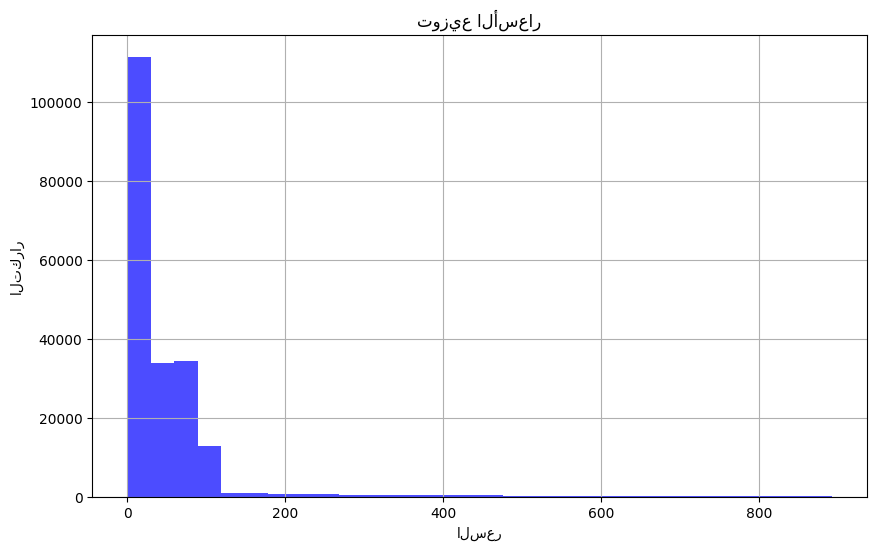

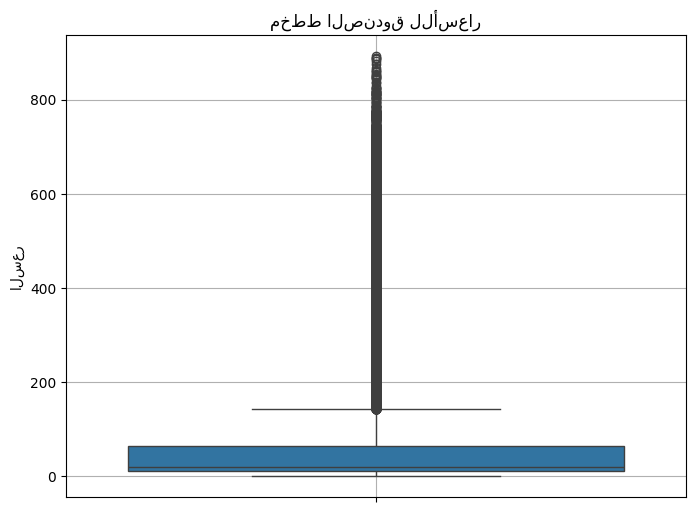

/tmp/ipykernel_45/1003518865.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf['Price'].dropna(), shade=True, color='green')


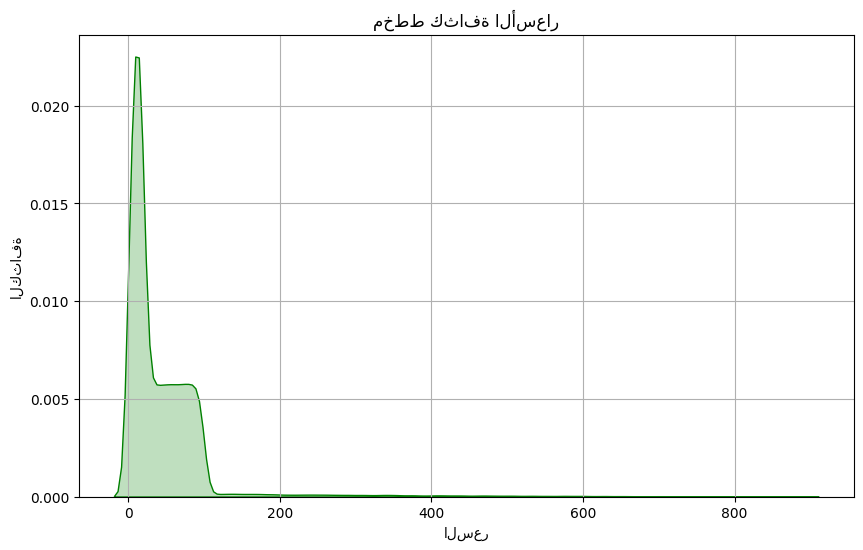

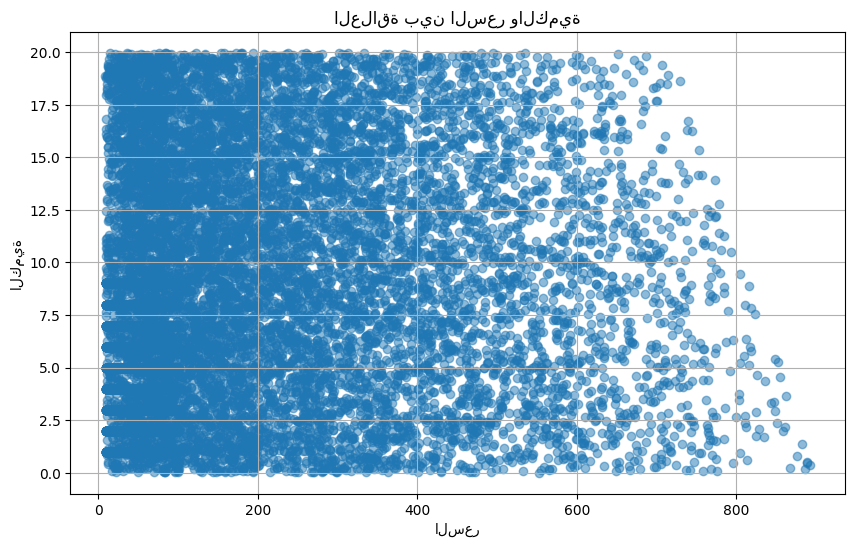

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(pdf['Price'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('توزيع الأسعار')
plt.xlabel('السعر')
plt.ylabel('التكرار')
plt.grid(True)
plt.show()

# 2. رسم مخطط الصندوق للأسعار
plt.figure(figsize=(8, 6))
sns.boxplot(y=pdf['Price'])
plt.title('مخطط الصندوق للأسعار')
plt.ylabel('السعر')
plt.grid(True)
plt.show()

# 3. رسم مخطط كثافة الاحتمالية للأسعار
plt.figure(figsize=(10, 6))
sns.kdeplot(pdf['Price'].dropna(), shade=True, color='green')
plt.title('مخطط كثافة الأسعار')
plt.xlabel('السعر')
plt.ylabel('الكثافة')
plt.grid(True)
plt.show()

# 4. رسم مخطط العلاقة بين السعر والكمية
plt.figure(figsize=(10, 6))
plt.scatter(pdf['Price'], pdf['Quantity'], alpha=0.5)
plt.title('العلاقة بين السعر والكمية')
plt.xlabel('السعر')
plt.ylabel('الكمية')
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79c4b347-7adf-49e9-8227-d40455032374' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>